In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, roc_curve
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
warnings.simplefilter(action="ignore",category=UserWarning)

In [33]:
df=pd.read_csv("D:\Ivy\Files\projects\Customer_Churn\Customer_Churn\churn_prediction.csv")
df.shape, df.dtypes

((28382, 21), customer_id                         int64
 vintage                             int64
 age                                 int64
 gender                             object
 dependents                        float64
 occupation                         object
 city                              float64
 customer_nw_category                int64
 branch_code                         int64
 days_since_last_transaction       float64
 current_balance                   float64
 previous_month_end_balance        float64
 average_monthly_balance_prevQ     float64
 average_monthly_balance_prevQ2    float64
 current_month_credit              float64
 previous_month_credit             float64
 current_month_debit               float64
 previous_month_debit              float64
 current_month_balance             float64
 previous_month_balance            float64
 churn                               int64
 dtype: object)

In [34]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [35]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [36]:
df["gender"].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [37]:
#missing value treatment for gender column: categorical
gend={"Male":0,"Female":1}
df.replace({"gender":gend},inplace=True)
df['gender']=df['gender'].fillna(-1)
df['gender'].isnull().sum()

0

In [38]:
#missing value treatment for dependents column: numerical
#mean_dep=df['dependents'].mean()
df['dependents']=df['dependents'].fillna(0)
df['dependents'].isnull().sum()

0

In [39]:
#missing value treatment for occupation column: categorical<mode value imputation>
#df["occupation"].value_counts()
df["occupation"]=df["occupation"].fillna("self_employed")
df['occupation'].isnull().sum()

0

In [40]:
#missing value treatment for city column
#mean_city=df['city'].mean()
df['city']=df['city'].fillna(1020)
df['city'].isnull().sum()

0

In [41]:
df['days_since_last_transaction']=df['days_since_last_transaction'].fillna(999)
df['days_since_last_transaction'].isnull().sum()

0

In [42]:
df=df.drop(['customer_id'],axis=1)
df=pd.concat([df,pd.get_dummies(df['occupation'],prefix=str('occupation'),prefix_sep='_')],axis=1)

In [43]:
#Pre-processing
#scaling using standard scaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
num_features=['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance']
for i in num_features:
    df[i]=np.log(df[i]+17000)
std=StandardScaler()
scaled=std.fit_transform(df[num_features])
scaled=pd.DataFrame(scaled,columns=num_features)
df_new=df.copy()
df=df.drop(num_features,axis=1)
df=df.merge(scaled,left_index=True,right_index=True,how="left")
y=df["churn"]
X=df.drop(["churn","occupation"],axis=1)

In [44]:
#baseline_col=['current_month_debit', 'previous_month_debit','current_balance','previous_month_end_balance','vintage'
#                 ,'occupation_retired', 'occupation_salaried','occupation_self_employed', 'occupation_student']
#df_baseline=df[baseline_col]
features = ['customer_nw_category', 'current_balance',
            'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ',
            'current_month_credit','previous_month_credit', 'current_month_debit', 
            'previous_month_debit','current_month_balance', 'previous_month_balance','occupation_retired',
            'occupation_salaried','occupation_self_employed', 'occupation_student']
X = df[features]
y = df.churn
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10,stratify=y)
model=LogisticRegression()
model.fit(X_train,y_train)#system fault
pred=model.predict_proba(X_test)[:,1]

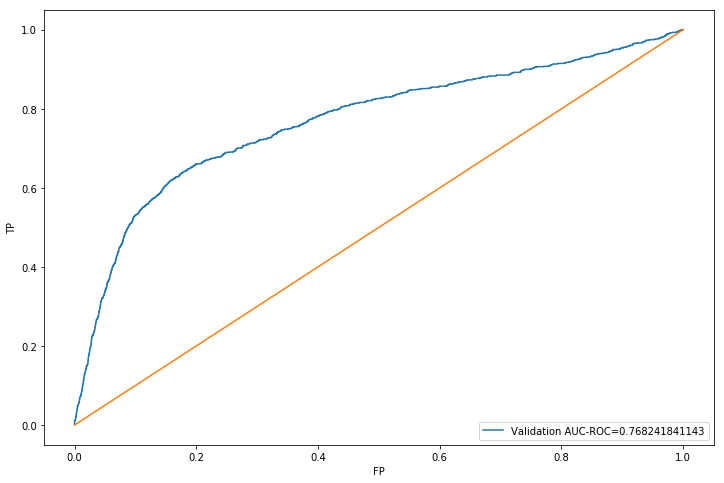

In [15]:
#AUC-ROC curve
fpr,tpr,_ = roc_curve(y_test, pred)
auc = roc_auc_score(y_test,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="Validation AUC-ROC="+str(auc))
x=np.linspace(0,1,1000)
plt.plot(x,x)
plt.xlabel("FP")
plt.ylabel("TP")
plt.legend(loc=4)
plt.show()

In [45]:
#confusion matrix
pred_val = model.predict(X_test)
label_preds=pred_val
cm=confusion_matrix(y_test,label_preds)
cm

array([[5667,  114],
       [1024,  291]], dtype=int64)

In [46]:
#recall
recall_score(y_test,pred_val)

0.22129277566539923

In [47]:
#accuracy
accuracy_score(y_test, pred_val)

0.83962795941375423

In [48]:
#Cross-validated model including all features
from sklearn.cross_validation import cross_val_score
scores=cross_val_score(model,X,y,cv=10,scoring='accuracy')
print(scores.mean())

0.839863141519


In [49]:
#search for an optimal k
k_range=range(1,21)
k_scores=[]
for k in k_range:
    model=LogisticRegression()
    scores=cross_val_score(model,X,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317, 0.83986314151947317]


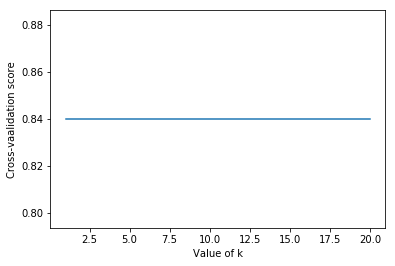

In [50]:
#plotting the scene
plt.plot(k_range, k_scores)
plt.xlabel('Value of k')
plt.ylabel('Cross-vaalidation score')

In [51]:
#Cross-validated Reverse-Feature Elimination(top 10 features)
from sklearn.feature_selection import RFE, RFECV
model=LogisticRegression()
rfecv = RFECV(model, step=1, cv=10, scoring="accuracy")
rfecv = rfecv.fit(X_train,y_train)

In [52]:
print("Optimal number of features:",rfecv.n_features_)
print("Best Features:",X_train.columns[rfecv.support_])
rfecv.grid_scores_

Optimal number of features: 5
Best Features: Index(['current_balance', 'average_monthly_balance_prevQ2',
       'average_monthly_balance_prevQ', 'current_month_balance',
       'previous_month_balance'],
      dtype='object')


array([ 0.81466697,  0.84074033,  0.84012956,  0.84130422,  0.84177373,
        0.84027034,  0.84031733,  0.84008253,  0.83970676,  0.83951877,
        0.84031767,  0.8404586 ,  0.84064657,  0.84088144,  0.84083445])

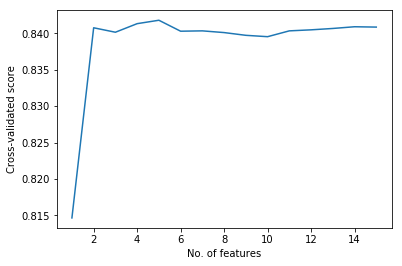

In [53]:
plt.figure()
plt.xlabel("No. of features")
plt.ylabel('Cross-validated score')
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [54]:
def generate(model, x, y):
    acc = accuracy_score(y, model.predict(x))
    print("Accuracy score: ",acc)
    return 1

In [55]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)
rfecv_model = model.fit(X_train_rfecv, y_train)
generate(rfecv_model, X_test_rfecv, y_test)

Accuracy score:  0.841600901917


1